In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!gdown --id 1Rb-9DYp8hHO60Tk_-_kK1E7Axeaog4rA # dataset

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Rb-9DYp8hHO60Tk_-_kK1E7Axeaog4rA
To: /content/segthor png.7z
100% 771M/771M [00:04<00:00, 166MB/s]


In [ ]:
!gdown --id 1XA3RD_sKtcNitf-3SQ_a85_v9Q2_DU3r # resnet weights

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1XA3RD_sKtcNitf-3SQ_a85_v9Q2_DU3r
To: /content/resnet18_v2.pth
100% 44.8M/44.8M [00:00<00:00, 68.5MB/s]


In [ ]:
!7z x '/content/segthor png.7z' -o"/content/segthor"


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 771039890 bytes (736 MiB)

Extracting archive: /content/segthor png.7z
 11% 4096 Open              WARNING:
/content/segthor png.7z
Can not open the file as [7z] archive
The file is open as [zip] archive

--
Path = /content/segthor png.7z
Open WARNING: Can not open the file as [7z] archive
Type = zip
Physical Size = 771039890

  0%      2% 431 - segthor png/Patient_01_image_74.png                                                2% 1011 - segthor png/Patient_02_image_183.png                                

In [ ]:
!pip install -q segmentation-models-pytorch transformers

     |████████████████████████████████| 88 kB 4.1 MB/s 
     |████████████████████████████████| 4.2 MB 32.6 MB/s 
     |████████████████████████████████| 376 kB 65.2 MB/s 
     |████████████████████████████████| 58 kB 7.6 MB/s 
     |████████████████████████████████| 596 kB 62.6 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 6.6 MB 54.9 MB/s 


In [ ]:
from torch.utils.data import DataLoader, Dataset
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
from torchvision import transforms
import torchvision.transforms.functional as TF
import torch.optim as optim
from torch.optim import lr_scheduler
from time import time
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os
import numpy as np
from IPython.display import clear_output
import time
import pandas as pd

class CTA_Dataset(Dataset):
    def __init__(self, csv_root, png_root):
        self.csv = pd.read_csv(csv_root)
        self.root = png_root
   
    def __getitem__(self, idx):
        image = np.asarray(Image.open(os.path.join(self.root, self.csv.loc[idx, 'filename_image'])).convert('L'))
        mask = np.asarray(Image.open(os.path.join(self.root, self.csv.loc[idx, 'filename_label'])).convert('L'))
        resolution = (int(self.csv.loc[idx, 'resolution'].split(',')[0][1:]),
                      int(self.csv.loc[idx, 'resolution'].split(',')[1][1:-1]))
        filename = self.csv.loc[idx, 'filename_image']

        trans = transforms.Compose([transforms.ToTensor(),
                                    ])
        mask = trans(mask)
        image = trans(image)

        mask = TF.resize(mask, 224)
        image = TF.resize(image, 224)

        return {'image': image.float(),
                'mask': mask.float(),
                'resolution': torch.tensor(resolution),
                'filename': filename}

    def __len__(self):
        return self.csv.shape[0]

In [ ]:
dataset = CTA_Dataset('/content/segthor.csv', '/content/segthor/segthor png')

print('Размер датасета', len(dataset))

Размер датасета 17269


In [ ]:
!git clone https://github.com/HuCaoFighting/Swin-Unet.git

Cloning into 'Swin-Unet'...
remote: Enumerating objects: 55, done.
remote: Total 55 (delta 0), reused 0 (delta 0), pack-reused 55
Unpacking objects: 100% (55/55), done.


In [ ]:
!pip install -q -r /content/Swin-Unet/requirements.txt

     |████████████████████████████████| 753.4 MB 7.5 kB/s 
     |████████████████████████████████| 4.0 MB 52.9 MB/s 
     |████████████████████████████████| 125 kB 77.0 MB/s 
     |████████████████████████████████| 77 kB 7.4 MB/s 
     |████████████████████████████████| 151 kB 66.8 MB/s 
     |████████████████████████████████| 48.4 MB 1.4 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.12.0 requires torch==1.11.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.11.0+cu113 requires torch==1.11.0, but you have torch 1.4.0 which is incompatible.


In [ ]:
!pip install -q -U torch torchvision

     |████████████████████████████████| 750.6 MB 11 kB/s 
     |████████████████████████████████| 21.0 MB 49.3 MB/s 


In [ ]:
!gdown --id 1TyMf0_uvaxyacMmVzRfqvLLAWSOE2bJR

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1TyMf0_uvaxyacMmVzRfqvLLAWSOE2bJR
To: /content/swin_tiny_patch4_window7_224.pth
100% 114M/114M [00:01<00:00, 80.9MB/s]


In [ ]:
%cd /content/Swin-Unet/

/content/Swin-Unet


In [ ]:
!pip install -q einops timm yacs

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:133: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


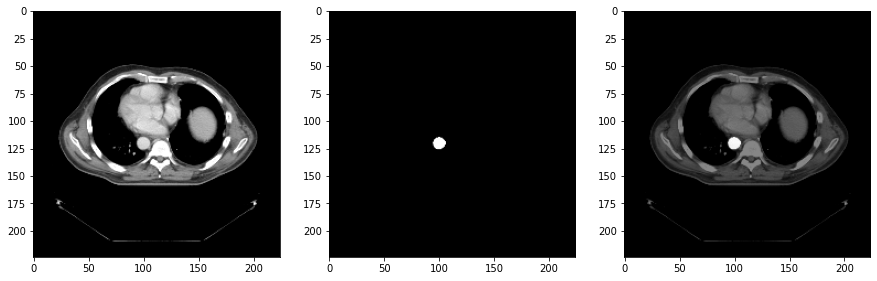

In [ ]:
data = dataset.__getitem__(800)
image = data['image']
mask = data['mask']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 15))
ax1.imshow(image[0], cmap='gray')
ax2.imshow(mask[0], cmap='gray')
ax3.imshow(image[0] + mask[0], cmap='gray')
plt.show()

In [ ]:
train_size = int(0.75 * len(dataset))
test_size = len(dataset) - train_size
torch.manual_seed(42)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

data_loader_train = torch.utils.data.DataLoader(
 train_dataset, batch_size=32, shuffle=True)

data_loader_val = torch.utils.data.DataLoader(
 val_dataset, batch_size=32, shuffle=False)

In [ ]:
def iou_pytorch(outputs: torch.Tensor, labels: torch.Tensor):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
    outputs = outputs.squeeze(1).byte()  # BATCH x 1 x H x W => BATCH x H x W
    labels = labels.squeeze(1).byte()
    SMOOTH = 1e-8
    intersection = (outputs & labels).float().sum((1, 2))  # Will be zero if Truth=0 or Prediction=0
    union = (outputs | labels).float().sum((1, 2))         # Will be zzero if both are 0
    
    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0
    
    return iou

In [ ]:
import segmentation_models_pytorch as smp

loss_fn = smp.losses.DiceLoss(mode='multiclass', from_logits=True)

In [ ]:
import os
import yaml
from yacs.config import CfgNode as CN

_C = CN()

# Base config files
_C.BASE = ['']

# -----------------------------------------------------------------------------
# Data settings
# -----------------------------------------------------------------------------
_C.DATA = CN()
# Batch size for a single GPU, could be overwritten by command line argument
_C.DATA.BATCH_SIZE = 128
# Path to dataset, could be overwritten by command line argument
_C.DATA.DATA_PATH = ''
# Dataset name
_C.DATA.DATASET = 'imagenet'
# Input image size
_C.DATA.IMG_SIZE = 224
# Interpolation to resize image (random, bilinear, bicubic)
_C.DATA.INTERPOLATION = 'bicubic'
# Use zipped dataset instead of folder dataset
# could be overwritten by command line argument
_C.DATA.ZIP_MODE = False
# Cache Data in Memory, could be overwritten by command line argument
_C.DATA.CACHE_MODE = 'part'
# Pin CPU memory in DataLoader for more efficient (sometimes) transfer to GPU.
_C.DATA.PIN_MEMORY = True
# Number of data loading threads
_C.DATA.NUM_WORKERS = 8

# -----------------------------------------------------------------------------
# Model settings
# -----------------------------------------------------------------------------
_C.MODEL = CN()
# Model type
_C.MODEL.TYPE = 'swin'
# Model name
_C.MODEL.NAME = 'swin_tiny_patch4_window7_224'
# Checkpoint to resume, could be overwritten by command line argument
_C.MODEL.PRETRAIN_CKPT = '/content/swin_tiny_patch4_window7_224.pth'
_C.MODEL.RESUME = ''
# Number of classes, overwritten in data preparation
_C.MODEL.NUM_CLASSES = 2
# Dropout rate
_C.MODEL.DROP_RATE = 0.0
# Drop path rate
_C.MODEL.DROP_PATH_RATE = 0.1
# Label Smoothing
_C.MODEL.LABEL_SMOOTHING = 0.1

# Swin Transformer parameters
_C.MODEL.SWIN = CN()
_C.MODEL.SWIN.PATCH_SIZE = 4
_C.MODEL.SWIN.IN_CHANS = 3
_C.MODEL.SWIN.EMBED_DIM = 96
_C.MODEL.SWIN.DEPTHS = [2, 2, 6, 2]
_C.MODEL.SWIN.DECODER_DEPTHS = [2, 2, 6, 2]
_C.MODEL.SWIN.NUM_HEADS = [3, 6, 12, 24]
_C.MODEL.SWIN.WINDOW_SIZE = 7
_C.MODEL.SWIN.MLP_RATIO = 4.
_C.MODEL.SWIN.QKV_BIAS = True
_C.MODEL.SWIN.QK_SCALE = None
_C.MODEL.SWIN.APE = False
_C.MODEL.SWIN.PATCH_NORM = True
_C.MODEL.SWIN.FINAL_UPSAMPLE= "expand_first"

# -----------------------------------------------------------------------------
# Training settings
# -----------------------------------------------------------------------------
_C.TRAIN = CN()
_C.TRAIN.START_EPOCH = 0
_C.TRAIN.EPOCHS = 300
_C.TRAIN.WARMUP_EPOCHS = 20
_C.TRAIN.WEIGHT_DECAY = 0.05
_C.TRAIN.BASE_LR = 5e-4
_C.TRAIN.WARMUP_LR = 5e-7
_C.TRAIN.MIN_LR = 5e-6
# Clip gradient norm
_C.TRAIN.CLIP_GRAD = 5.0
# Auto resume from latest checkpoint
_C.TRAIN.AUTO_RESUME = True
# Gradient accumulation steps
# could be overwritten by command line argument
_C.TRAIN.ACCUMULATION_STEPS = 0
# Whether to use gradient checkpointing to save memory
# could be overwritten by command line argument
_C.TRAIN.USE_CHECKPOINT = False

# LR scheduler
_C.TRAIN.LR_SCHEDULER = CN()
_C.TRAIN.LR_SCHEDULER.NAME = 'cosine'
# Epoch interval to decay LR, used in StepLRScheduler
_C.TRAIN.LR_SCHEDULER.DECAY_EPOCHS = 30
# LR decay rate, used in StepLRScheduler
_C.TRAIN.LR_SCHEDULER.DECAY_RATE = 0.1

# Optimizer
_C.TRAIN.OPTIMIZER = CN()
_C.TRAIN.OPTIMIZER.NAME = 'adamw'
# Optimizer Epsilon
_C.TRAIN.OPTIMIZER.EPS = 1e-8
# Optimizer Betas
_C.TRAIN.OPTIMIZER.BETAS = (0.9, 0.999)
# SGD momentum
_C.TRAIN.OPTIMIZER.MOMENTUM = 0.9

# -----------------------------------------------------------------------------
# Augmentation settings
# -----------------------------------------------------------------------------
_C.AUG = CN()
# Color jitter factor
_C.AUG.COLOR_JITTER = 0.4
# Use AutoAugment policy. "v0" or "original"
_C.AUG.AUTO_AUGMENT = 'rand-m9-mstd0.5-inc1'
# Random erase prob
_C.AUG.REPROB = 0.25
# Random erase mode
_C.AUG.REMODE = 'pixel'
# Random erase count
_C.AUG.RECOUNT = 1
# Mixup alpha, mixup enabled if > 0
_C.AUG.MIXUP = 0.8
# Cutmix alpha, cutmix enabled if > 0
_C.AUG.CUTMIX = 1.0
# Cutmix min/max ratio, overrides alpha and enables cutmix if set
_C.AUG.CUTMIX_MINMAX = None
# Probability of performing mixup or cutmix when either/both is enabled
_C.AUG.MIXUP_PROB = 1.0
# Probability of switching to cutmix when both mixup and cutmix enabled
_C.AUG.MIXUP_SWITCH_PROB = 0.5
# How to apply mixup/cutmix params. Per "batch", "pair", or "elem"
_C.AUG.MIXUP_MODE = 'batch'

# -----------------------------------------------------------------------------
# Testing settings
# -----------------------------------------------------------------------------
_C.TEST = CN()
# Whether to use center crop when testing
_C.TEST.CROP = True

In [ ]:
import argparse
import logging
import os
import random
import numpy as np
from networks.vision_transformer import SwinUnet as ViT_seg

net = ViT_seg(_C, img_size=224, num_classes=2).cuda()

SwinTransformerSys expand initial----depths:[2, 2, 6, 2];depths_decoder:[1, 2, 2, 2];drop_path_rate:0.1;num_classes:2


/usr/local/lib/python3.7/dist-packages/torch/functional.py:568: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2228.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


---final upsample expand_first---


In [ ]:
net.load_from(_C)

pretrained_path:/content/swin_tiny_patch4_window7_224.pth
---start load pretrained modle of swin encoder---


In [ ]:
from torchvision import models

resnet = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
resnet.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
resnet.fc = nn.Linear(512, 1)
resnet.load_state_dict(torch.load('/content/resnet18_v2.pth'))

optimizer = torch.optim.AdamW(net.parameters(), lr=1e-4)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net.to(device)
resnet.to(device)

for p in resnet.parameters():
    p.requires_grad = False

Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
from transformers import get_scheduler

num_epochs = 20
num_training_steps = num_epochs * len(data_loader_train)
lr_scheduler = get_scheduler(
    'cosine',
    optimizer=optimizer,
    num_warmup_steps=2 * len(data_loader_train),
    num_training_steps=num_training_steps,
)

In [ ]:
THRESHOLD = 0.01 # получен ранее (см. resnet)
device = 'cuda'
def train(cls_model, seg_model, opt, scheduler, loss_fn, epochs, data_tr, data_val, score=True):
    data = next(iter(data_val))
    X_val, Y_val = data['image'], data['mask']
    history_train_loss = []
    history_val_loss = []
    best_loss = np.inf
    best_metric = -1
    if score:
        history_metric = []

    cls_model.eval()
    sigmoid = nn.Sigmoid()
    start_time = time.time()
    for epoch in range(epochs):
        print('* Epoch %d/%d' % (epoch+1, epochs))

        train_avg_loss, val_avg_loss = 0, 0
        seg_model.train() 
        for data in data_tr:
            X_batch = data['image'].cuda()
            Y_batch = data['mask'].cuda()

            # resnet classifier
            cls_pred = (sigmoid(cls_model(X_batch)) >= THRESHOLD) * 1
            cls_pred = cls_pred.squeeze(1)
            true_idxs = cls_pred.nonzero().squeeze(1).tolist()

            opt.zero_grad()

            output = seg_model(X_batch[true_idxs]) 
            Y_pred = torch.zeros((Y_batch.size(0), 2, Y_batch.size(2), Y_batch.size(3)), dtype=torch.float32).to(device)
            Y_pred[true_idxs] = output

            loss = loss_fn(output, Y_batch[true_idxs].long())
            loss.backward()
            opt.step()
            
            scheduler.step()
            train_avg_loss += loss.item() / len(data_tr) 
            
        history_train_loss.append(train_avg_loss)

        seg_model.eval()  # testing mode
        scores = 0
        with torch.no_grad():
            for data in data_val:
                X_batch = data['image'].to(device)
                Y_batch = data['mask'].to(device)


                cls_pred = (sigmoid(cls_model(X_batch)) >= THRESHOLD) * 1
                cls_pred = cls_pred.squeeze(1)
                true_idxs = cls_pred.nonzero().squeeze(1).tolist()

                output = seg_model(X_batch[true_idxs]) 
                Y_pred = torch.zeros((Y_batch.size(0), 2, Y_batch.size(2), Y_batch.size(3)), dtype=torch.float32).to(device)
                Y_pred[true_idxs] = output

                scores += iou_pytorch(Y_pred.argmax(1).long(), Y_batch.long()).mean().item()

                loss = loss_fn(output, Y_batch[true_idxs].long())

                val_avg_loss += loss.item() / len(data_val)

            history_val_loss.append(val_avg_loss)
            metric = scores / len(data_val)

            elapsed_time = time.time() - start_time
            loss_log = f'Train loss: {train_avg_loss:0.5f}, Elapsed_time: {elapsed_time:0.5f}'
            current_model_log = f'{"Current_metric":17s}: {metric:0.3f}, {"Current_loss":17s}: {val_avg_loss:0.2f}'

            if val_avg_loss < best_loss:
                best_loss = val_avg_loss
                torch.save(seg_model.state_dict(), f'/content/drive/MyDrive/transunet_best_loss.pth')

            if metric > best_metric:
                best_metric = metric
                torch.save(seg_model.state_dict(), f'/content/drive/MyDrive/transunet_best_metric.pth')

            if score:
                history_metric.append(metric)

        best_model_log = f'{"Best_metric":17s}: {best_metric:0.3f}, {"Best_loss":17s}: {best_loss:0.2f}'
        loss_model_log = f'{loss_log}\n{current_model_log}\n{best_model_log}'
        
        print(loss_model_log)
        dashed_line = '-' * 80
        print(dashed_line)
    if score:
        return history_train_loss, history_val_loss, metric
    else:  
        return history_train_loss, history_val_loss

In [ ]:
train_loss, val_loss, score = train(resnet, net, optimizer, lr_scheduler, loss_fn, num_epochs, data_loader_train, data_loader_val, score=True)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/functional.py:133: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


* Epoch 1/20
Train loss: 0.42592, Elapsed_time: 407.38252
Current_metric   : 0.715, Current_loss     : 0.16
Best_metric      : 0.715, Best_loss        : 0.16
--------------------------------------------------------------------------------
* Epoch 2/20
Train loss: 0.12214, Elapsed_time: 798.56796
Current_metric   : 0.820, Current_loss     : 0.08
Best_metric      : 0.820, Best_loss        : 0.08
--------------------------------------------------------------------------------
* Epoch 3/20
Train loss: 0.06775, Elapsed_time: 1188.26971
Current_metric   : 0.859, Current_loss     : 0.07
Best_metric      : 0.859, Best_loss        : 0.07
--------------------------------------------------------------------------------
* Epoch 4/20
Train loss: 0.05350, Elapsed_time: 1578.07388
Current_metric   : 0.893, Current_loss     : 0.05
Best_metric      : 0.893, Best_loss        : 0.05
--------------------------------------------------------------------------------
* Epoch 5/20
Train loss: 0.05139, Elapsed_

In [ ]:
torch.save(net.state_dict(), 'net.pth')

In [ ]:
data = next(iter(data_loader_val))
X_val, Y_val = data['image'], data['mask']
net.eval()
with torch.no_grad():
    Y_hat = net(X_val.to(device)).cpu().detach()

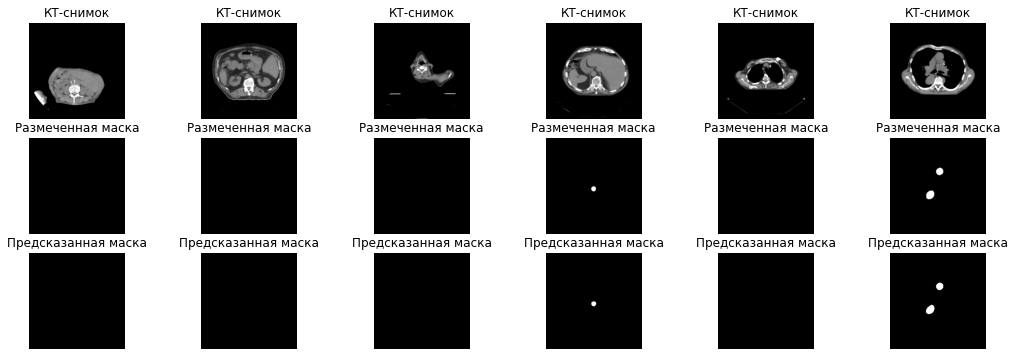

In [ ]:
# Visualize tools
clear_output(wait=True)
plt.figure(figsize=(18, 6))
for k in range(6):
    plt.subplot(3, 6, k+1)
    plt.imshow(np.rollaxis(X_val[k].cpu().numpy(), 0, 3)[:,:,0], cmap='gray')
    plt.title('КТ-снимок')
    plt.axis('off')

    plt.subplot(3, 6, k+7)
    plt.imshow(Y_val[k, 0].cpu().numpy(), cmap='gray')
    plt.title('Размеченная маска')
    plt.axis('off')

    plt.subplot(3, 6, k+13)
    plt.imshow(Y_hat[k].argmax(0).cpu().numpy(), cmap='gray')
    plt.title('Предсказанная маска')
    plt.axis('off')


plt.show()